In [2]:
import cv2
import numpy as np
import time
import matplotlib.pyplot as plt
import random

In [3]:
image = cv2.imread("42750036.jpeg")
image = cv2.GaussianBlur(image, (5,5), 0)

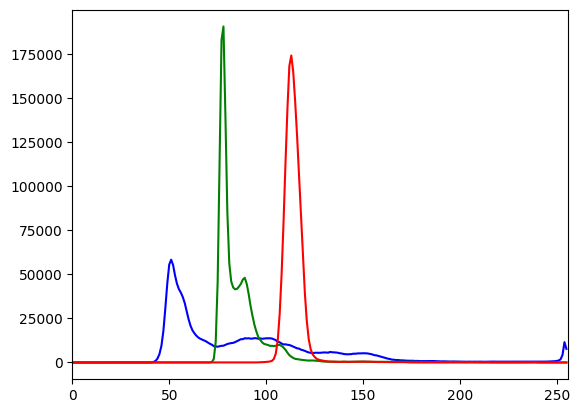

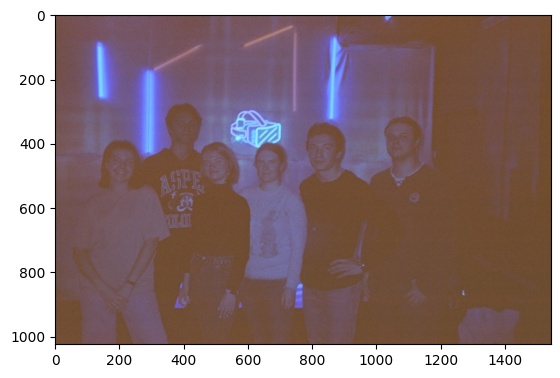

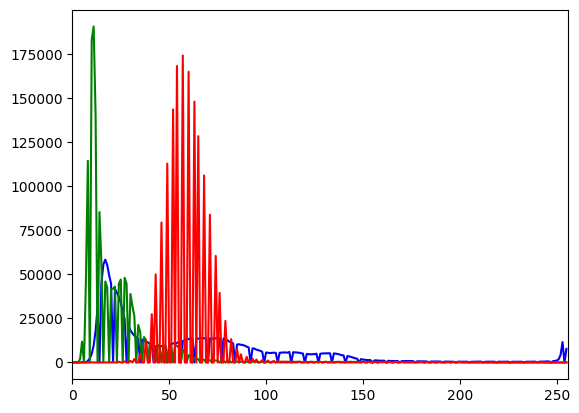

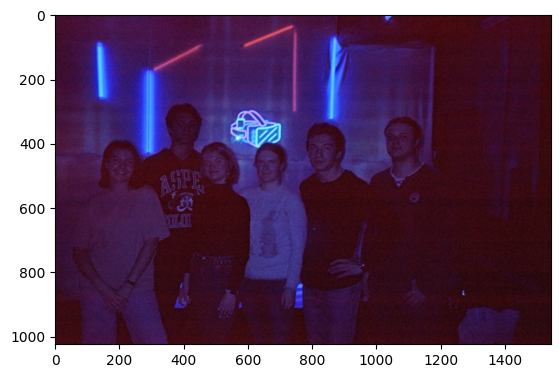

In [5]:
def printHist(img):
    """
    Вывод гистограммы изображения
    
    :param img: матрица цветного изображения
    """
    color = ('b','g','r')
    for i,col in enumerate(color):
        histr = cv2.calcHist([img],[i],None,[256],[0,256])
        plt.plot(histr,color = col)
        plt.xlim([0,256])
    plt.show()
def expendLayer(arr):
    """
    Повышение контраста монохромного изображения за счет компенсации интенсивности
    
    :param arr: матрица монохромного изображения
    
    :return newarr: матрица изображения с компенсированной интенсивностью 
    """
    hist = cv2.calcHist([arr],[0],None,[256],[0,256])
    for i in range(len(hist)): 
        if hist[i]>=1:
            ymin = i
            break
    for i in range(255,0,-1):
        if hist[i]>=1:
            ymax = i
            break
    newarr = np.zeros(arr.shape, dtype = "uint8")
    hist = cv2.calcHist([arr],[0],None,[256],[0,256])
    for x in range(len(arr)):
        for y in range(len(arr[x])):
            newarr[x,y] = (arr[x,y]-ymin)*255/(ymax-ymin)
    return newarr
def expendRGB(image):
    """
    Повышение контраста цветного изображения за счет компенсации интенсивности
    
    :param image: матрица цветного изображения
    
    :return merged_bgr: матрица изображения с компенсированной интенсивностью 
    """
    (b, g, r) = cv2.split(image)
    merged_rgb = cv2.merge([r,g,b])
    printHist(image)
    plt.imshow(merged_rgb); plt.show()
    b = expendLayer(b)
    g = expendLayer(g)
    r = expendLayer(r)
    merged_rgb = cv2.merge([r,g,b])
    merged_bgr = cv2.merge([b,g,r]) 
    printHist(merged_bgr)
    cv2.imwrite("test_good.jpg", merged_bgr)
    plt.imshow(merged_rgb); plt.show()
    return merged_bgr
newImage = expendRGB(image)

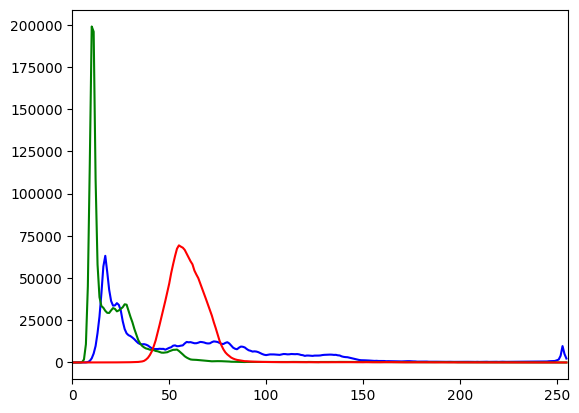

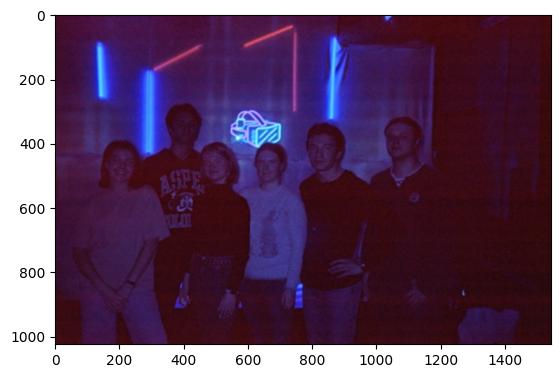

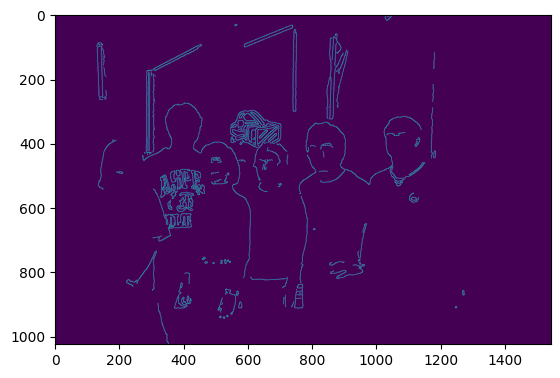

In [7]:
blurImage = cv2.GaussianBlur(newImage,(7,7),0)
printHist(blurImage)
rgb = cv2.merge(cv2.split(blurImage)[::-1])
plt.imshow(rgb); plt.show()
gray = cv2.cvtColor(blurImage, cv2.COLOR_BGR2GRAY)
t_lower = int(gray.mean()*3.5/3)
t_upper = int(gray.mean()*1.5/3)
edge = cv2.Canny(gray, t_lower, t_upper, L2gradient=True)
cv2.imwrite("test_edge.jpg", edge)
plt.imshow(edge); plt.show()